# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Mosquito-Thermal-Trait-Data" data-toc-modified-id="Mosquito-Thermal-Trait-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mosquito Thermal Trait Data</a></div><div class="lev2 toc-item"><a href="#Task-1:-Fitting-a-line,-revisited" data-toc-modified-id="Task-1:-Fitting-a-line,-revisited-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Task 1: Fitting a line, revisited</a></div><div class="lev3 toc-item"><a href="#Solution" data-toc-modified-id="Solution-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution</a></div><div class="lev2 toc-item"><a href="#Task-2:-Fitting-a-non-linear-trait-model" data-toc-modified-id="Task-2:-Fitting-a-non-linear-trait-model-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task 2: Fitting a non-linear trait model</a></div><div class="lev3 toc-item"><a href="#Solution" data-toc-modified-id="Solution-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution</a></div><div class="lev2 toc-item"><a href="#Task-2b:-Fitting-a-second-non-linear-function-(optional)" data-toc-modified-id="Task-2b:-Fitting-a-second-non-linear-function-(optional)-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Task 2b: Fitting a second non-linear function (optional)</a></div><div class="lev2 toc-item"><a href="#Task-3:-Compare-models" data-toc-modified-id="Task-3:-Compare-models-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Task 3: Compare models</a></div><div class="lev2 toc-item"><a href="#Extra-challenge" data-toc-modified-id="Extra-challenge-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Extra challenge</a></div>

In [ ]:
set.seed(1234)


## Mosquito Thermal Trait Data

The data for this question consist of thermal traits for _Aedes agypti_ mosquitos found in the data file ${\tt AeaegyptiTraitData.csv}$. There are four possible traits (as well as some data that are recorded as the inverse trait, which we ignore for now):

- pEA: proportion surviving from egg to adulthood
- MDR: mosquito development rate
- PDR: parasite development rate (= 1/EIP the extrinsic incubation period)
- $\mu$ (mu): death rate (= 1/longevity)

You will choose one of these four traits and fit a curve to the data by maximum likelihood. (You can also fit a curve to the data of your choosing.) You will base your code on that provided in the lecture/practical portion of the class. We provide a specific set of tasks to accomplish starting with easy tasks through to more challenging aspects. We'll compare results and models during the group discussion.

First we'll read in the data and look at the summary.



In [2]:
### load in the data
dat<-read.csv(file="../data/AeaegyptiTraitData.csv")
head(dat)

trait.name,T,trait,ref,trait2,trait2.name
pEA,22,0.90812,Westbrook_Thesis_2010,NA,NA
pEA,27,0.93590,Westbrook_Thesis_2010,NA,NA
pEA,32,0.81944,Westbrook_Thesis_2010,NA,NA
MDR,22,0.09174,Westbrook_Thesis_2010,NA,NA
MDR,27,0.13587,Westbrook_Thesis_2010,NA,NA
MDR,32,0.15823,Westbrook_Thesis_2010,NA,NA



Next let's plot the response output, ${\tt trait}$ across temperature, ${\tt T}$:



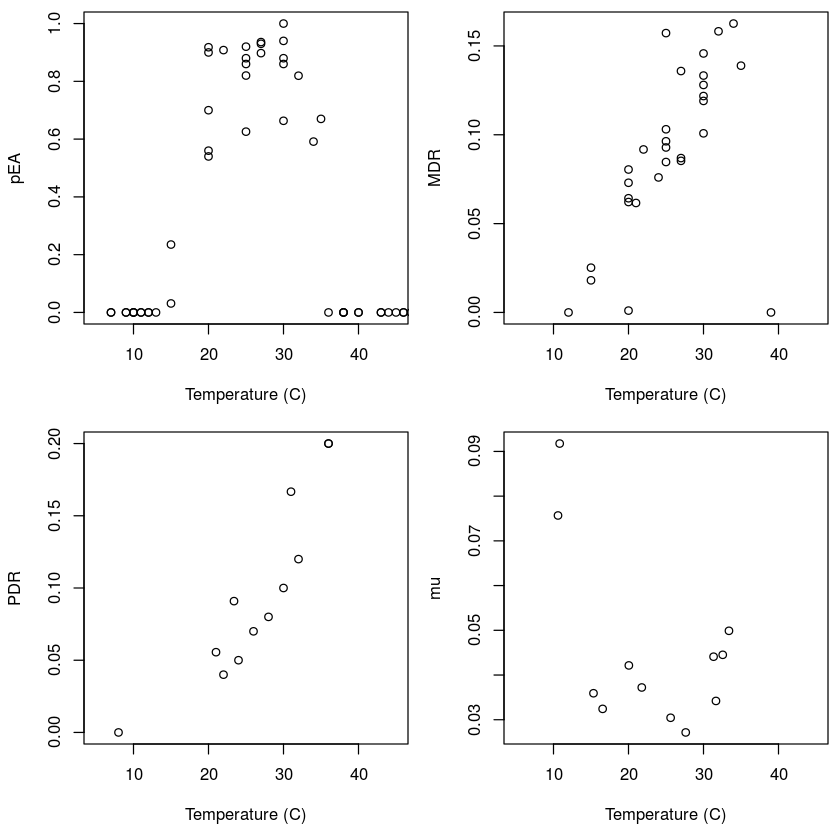

In [3]:
traits<-c("pEA", "MDR", "PDR", "mu")
par(mfrow=c(2,2), bty="o", mai=c(0.8,0.7,0.1,0.1))
for(i in 1:4){
  d.temp <- subset(dat, trait.name==traits[i])
  plot(trait ~ T, data=d.temp, xlab="Temperature (C)", ylab=traits[i], xlim=c(5, 45))
}





### Task 1: Fitting a line, revisited

1. Using the _nll.slr_ function and the code from the lecture, find the MLEs of the slope and intercept (i.e., find the best fitting line for your chosen trait).
2. Plot your data with the fitted line.
3. Plot the likelihood surface for $b_0$ and $b_1$ and indicate the MLEs your likelihood surface.
4. Obtain confidence intervals for your estimates.

#### Solution

First I will copy over the _nll.slr_ function from the lecture:



In [4]:

nll.slr<-function(par, dat, ...){
  args<-list(...)

  b0<-par[1]
  b1<-par[2]
  X<-dat$X
  Y<-dat$Y
  if(!is.na(args$sigma)){
    sigma<-args$sigma
  }else sigma<-par[3]

  mu<-b0+b1*X

  return(-sum(dnorm(Y, mean=mu, sd=sigma, log=TRUE)))
}


So that's our likelihood. Now I'll choose some data. For this example I'll use pEA.

___1. Find the MLEs___

I will use the code from the lecture almost verbatim. However, now I will replace the data with my pEA data:



In [5]:
d<-subset(dat, trait.name=="pEA")[,2:3]
names(d)<-c("X", "Y")

fit <- optim(nll.slr, par=c(2, 1, 5), method="L-BFGS-B", ## this is a n-D method
              lower=c(-Inf, -Inf, 0.1), upper=Inf, dat=d, sigma=NA)

fit

$par
[1]  0.401758669 -0.002630107  0.401978057

$value
[1] 27.91699

$counts
function gradient 
      46       46 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"


<br>
<br>

___2. Plot the fitted line with data___



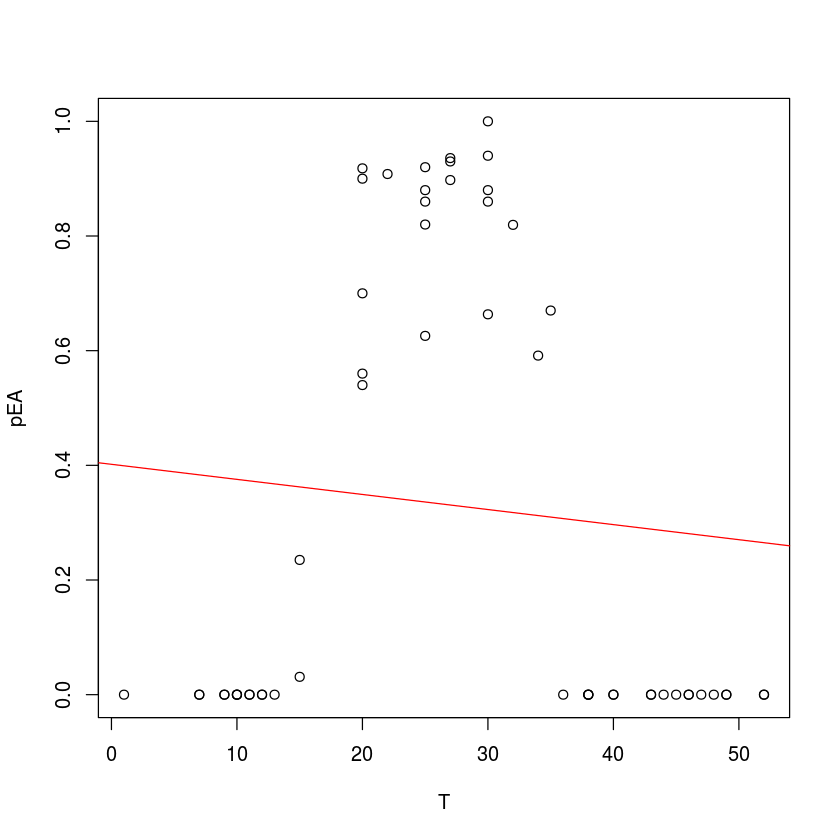

In [6]:
plot(d$X, d$Y, xlab="T", ylab="pEA")
abline(fit$par[1], fit$par[2], col=2)



<br>
<br>

___3. Build and plot the likelihood surface___



In [7]:
N0=100
N1=101
b0s<-seq(0,1, length=N0)
b1s<-seq(-0.2,0.2, length=N1)

mynll<-matrix(NA, nrow=N0, ncol=N1)
for(i in 1:N0){
  for(j in 1:N1) mynll[i,j]<-nll.slr(par=c(b0s[i],b1s[j]), dat=d, sigma=fit$par[3])
}

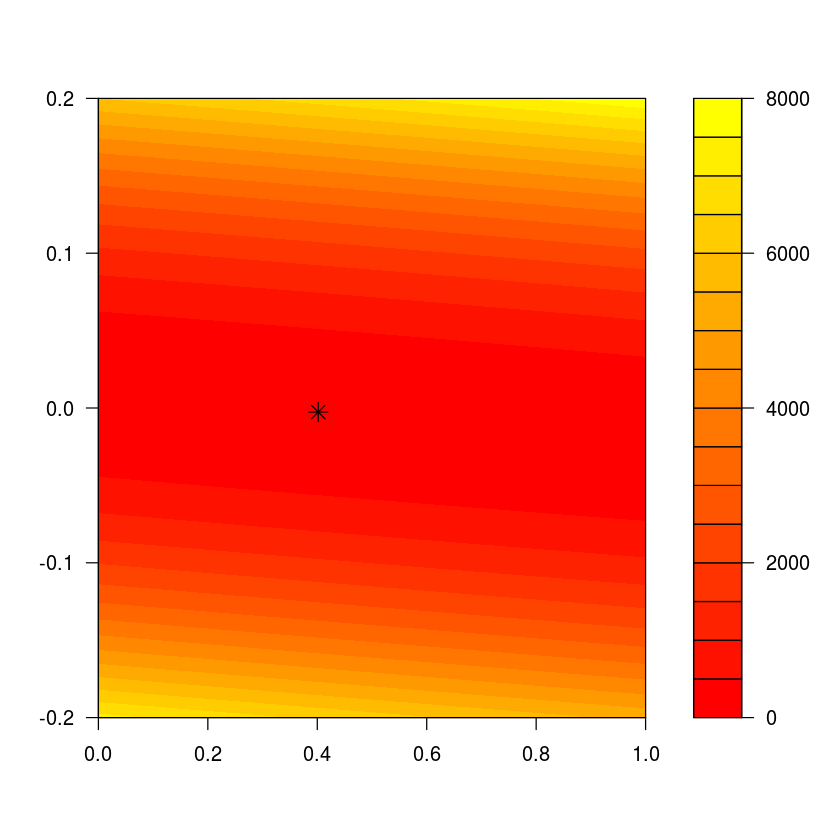

In [8]:
filled.contour(x = b0s,
               y = b1s,
               z= mynll,
               col=heat.colors(21),
               plot.axes = {axis(1); axis(2); points(fit$par[1],fit$par[2], pch=8, cex=1.5);
                 xlab="b0"; ylab="b1"})



<br>
<br>

___4. Confidence Intervals___



In [9]:
fit <- optim(nll.slr, par=c(2, 1, 5), method="L-BFGS-B", hessian=TRUE, ## this is a n-D method
              lower=c(-Inf, -Inf, 0.1), upper=Inf, dat=d, sigma=NA)

fisher_info<-solve(fit$hessian)
est_sigma<-sqrt(diag(fisher_info))
upper<-fit$par+1.96*est_sigma
lower<-fit$par-1.96*est_sigma
interval<-data.frame(param=c("b0", "b1", "sigma"), value=fit$par, upper=upper, lower=lower)
interval

param,value,upper,lower
b0,0.401758669,0.639331523,0.16418582
b1,-0.002630107,0.005033679,-0.01029389
sigma,0.401978057,0.477096983,0.32685913



<br>
<br>

### Task 2: Fitting a non-linear trait model

1. Choose a non-linear model to fit to your trait (e.g., quadratic, Briere...). We provide implemented functions in the code file ${\tt temp\_functions.R}$.
2. Using the _nll.slr_ function as an example, write your own function that calculates the negative log likelihood as a function of the parameters describing your trait and any additional parameters you need for an appropriate noise distribution (e.g., $\sigma$ if you have normal noise).
3. Use the _optim_ function to find the MLEs of all of your parameters.
4. Obtain a confidence interval for your estimate.
5. Plot the fitted function with the data and your fittend line from Task 1.

<br>

#### Solution

Because I am fitting the pEA trait and the pattern looks relatively symmetric, I will use a quadratic function as implemented in the ${\tt temp\_functions.R}$ file (this is the piecewise continuous one that goes to zero at the edges). I'll also write one that doesn't use that function, because the hessian doesn't always work properly for the peice-wise functions. I'm also going to write a little wrapper function to return the interval.

___2. Likelihood function___

Here is my updated likelihood function:



In [11]:
source("../code/temp_functions.R")

nll.quad<-function(par, dat, ...){
  args<-list(...)

  T0<-par[1]
  Tm<-par[2]
  qd<-par[3]
  X<-dat$X
  Y<-dat$Y
  if(!is.na(args$sigma)){
    sigma<-args$sigma
  }else sigma<-par[4]

  mu<-quad(X,T0,Tm,qd)## qd*(X-T0)*(X-Tm)*(X<=Tm)*(X>=T0)

  return(-sum(dnorm(Y, mean=mu, sd=sigma, log=TRUE)))
}

nll.quad2<-function(par, dat, ...){
  args<-list(...)

  T0<-par[1]
  Tm<-par[2]
  qd<-par[3]
  X<-dat$X
  Y<-dat$Y
  if(!is.na(args$sigma)){
    sigma<-args$sigma
  }else sigma<-par[4]

  mu<-qd*(X-T0)*(X-Tm)

  return(-sum(dnorm(Y, mean=mu, sd=sigma, log=TRUE)))
}

CIs.from.fit<-function(fit, params=c("b0", "b1", "sigma")){
  fisher_info<-solve(fit$hessian)
  est_sigma<-sqrt(diag(fisher_info))
  upper<-fit$par+1.96*est_sigma
  lower<-fit$par-1.96*est_sigma
  interval<-data.frame(param=params, value=fit$par, upper=upper, lower=lower)
  return(interval)
}



<br>
<br>

___3 & 4. MLEs and CIs___

Here is the fitting. Make sure to always check that the algorithm at least thinks that its converged.



In [12]:
fit2 <- optim(nll.quad, par=c(5, 32, -0.01, 0.01), method="L-BFGS-B", hessian=TRUE,
              lower=c(0, -Inf, -Inf, 0.0001), upper=Inf, dat=d, sigma=NA)
              #control=list(fnscale=0.1, parscale=c(1,1,100,1)))
fit2

2.047098e+01,-1.254229e+01,2.325480e+04,-8.980816e-05
-1.254229e+01,2.661491e+01,-2.367136e+04,-7.090861e-04
2.325480e+04,-2.367136e+04,3.760573e+07,3.199393e-01
-8.980816e-05,-7.090861e-04,3.199393e-01,1.187707e+04


In [13]:
CIs.from.fit(fit2, params=c("T0", "Tm", "qd", "sigma"))

param,value,upper,lower
T0,14.059903145,14.87973083,13.240075462
Tm,38.107217463,38.69835209,37.516082831
qd,-0.006427297,-0.00565838,-0.007196214
sigma,0.096270723,0.11425535,0.078286100




For comparison, I can fit the standard quadratic -- however, in that case, I don't want to use all of the extra zero data because they'll tend to pull the curve value out.



In [14]:
o<-order(d$X)
do<-d[o,]
wl<-min(which(do$X==12))
wu<-max(which(do$X==38))
do<-do[wl:wu,]


In [15]:
fit2b <- optim(nll.quad2, par=c(5, 40, -0.01, 0.01), method="L-BFGS-B", hessian=TRUE,
              lower=c(0, -Inf, -Inf, 0.0001), upper=c(Inf,Inf,Inf,0.2), dat=do, sigma=NA)
fit2b

11.0271836,-5.234934e+00,1.134206e+04,-2.030600e-03
-5.2349335,1.112756e+01,-1.237111e+04,-9.303815e-04
11342.0627840,-1.237111e+04,2.336915e+07,-1.807936e+00
-0.0020306,-9.303815e-04,-1.807936e+00,3.196003e+03


In [16]:
CIs.from.fit(fit2b, params=c("T0", "Tm", "qd", "sigma"))

param,value,upper,lower
T0,12.916953139,13.760940119,12.072966158
Tm,38.359608348,39.286511992,37.432704704
qd,-0.005616735,-0.004820211,-0.006413258
sigma,0.139301085,0.173970979,0.104631191



<br>
<br>

___5. Plots___



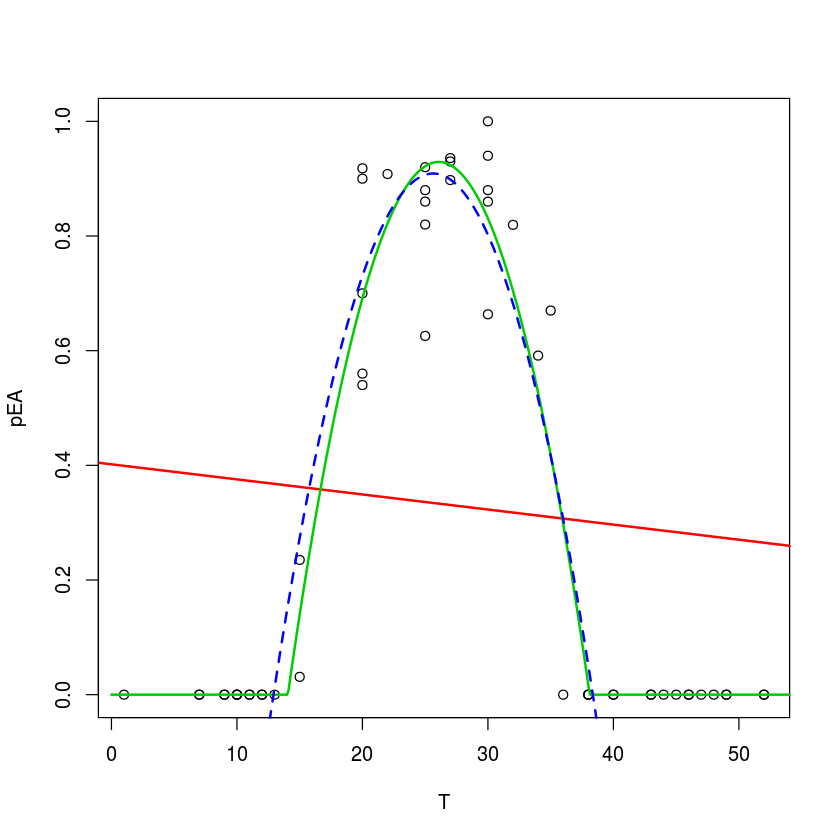

In [17]:
plot(d$X, d$Y, xlab="T", ylab="pEA")
abline(fit$par[1], fit$par[2], col=2, lwd=2)

ts<-seq(0, 55, length=500)
lines(ts, quad(ts, fit2$par[1], fit2$par[2], fit2$par[3]), col=3, lwd=2)
lines(ts, (ts-fit2b$par[1])*(ts-fit2b$par[2])*fit2b$par[3], col=4, lwd=2, lty=2)


<br>
<br>

### Task 2b: Fitting a second non-linear function (optional)

Choose a second non-linear function to fit to your trait data. Find the MLEs and fit this curve to your data. Plot the fit together with your previous fits and the data



<br>
<br>

### Task 3: Compare models

Now compare your 2-3 models via AIC or BIC (optional: calculate the relative model probabilities). Which comes out on top? Is this what you expected?

The __value__ that's returned by optim is the negative log likelihood. Recall the AIC is simply:
$$
\mathrm{AIC} = -2\mathcal{l} +2\times k
$$
where $\mathcal{l}$ is the log-likelihood and k is the number of parameters. Similarly BIC is
$$
\mathrm{BIC} = -2\mathcal{l} + \log(n)\times k
$$
where $n$ is the number of data points. Make sure that you only compare models fit with the same data!



In [18]:
n<-length(d$Y)
myBIC<-function(fit, n){
  k<-length(fit$par)
  return(2*fit$value+log(n)*k)
}


bics<-c(fit=myBIC(fit,n), fit2=myBIC(fit2,n))

bics

ebics<-exp(-0.5*(bics-min(bics)))

probs<-ebics/sum(ebics)

round(probs, 5)


fit      fit2 
 67.85599 -85.36228

fit fit2 
   0    1


There's no comparison -- the quadratic is much better here. This jives with what we see in the plots.

<br>
<br>


### Extra challenge

If you have the time and the interest you may try to fit curves to all of the 4 traits!

<br>
<br>
<br>
